In [1]:
!pip install us

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 6.2 MB/s eta 0:00:00
  Created wheel for us: filename=us-3.1.1-py3-none-any.whl size=12545 sha256=ec70e45945ff034400854dbf60bea36147333dfab5485d2c2939a081ea2620fc
  Stored in directory: /root/.cache/pip/wheels/da/f9/64/9669135a7ce533faf78e3b32259c505f964f03b069be6844f8
Successfully built us


In [6]:
import pandas as pd
from sklearn.cluster import KMeans
from google.colab import files
import matplotlib.pyplot as plt
import datetime
from pandas_datareader import data as pdr
import io
import yfinance as yfin
import seaborn as sns
import statsmodels.api as sm
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import us
import numpy as np

In [4]:
uploaded = files.upload()

Saving dso_545_project.csv to dso_545_project.csv


In [5]:
df = pd.read_csv(io.BytesIO(uploaded['dso_545_project.csv']))
df.head()

,Ticker,ESG Score,Governance Score,Environment Score,Social Score,ESG Score Date,ESG Status,CEO Full Name,CEO Gender,CEO Status,Year,New ESG Date,Adjusted Close,YTD,YTD Before ESG,Headquarters Location,Sector
0,MMM,33.61,7.72,12.33,13.56,01/08/2022,success,Mr. Michael F. Roman,male,success,22,2022-01-08,160.491150,-0.195048,-0.049736,"Saint Paul, Minnesota",Industrials
1,AOS,25.43,6.27,7.29,11.87,01/01/2023,success,Mr. Kevin J. Wheeler,male,success,23,2023-01-01,57.854630,0.057744,-0.042310,"Milwaukee, Wisconsin",Industrials
2,ABT,24.98,8.36,3.03,13.59,01/08/2022,success,Mr. Robert B. Ford,male,success,22,2022-01-08,130.418701,-0.224739,0.190012,"North Chicago, Illinois",Health Care
3,ABBV,27.84,9.95,1.12,16.77,01/08/2022,success,Mr. Richard A. Gonzalez,male,success,22,2022-01-08,126.178093,0.124772,0.289147,"North Chicago, Illinois",Health Care
4,ACN,9.71,4.83,0.29,4.58,01/08/2022,success,Ms. Julie T. Spellman Sweet,female,success,22,2022-01-08,362.224915,-0.157583,0.440266,"Dublin, Ireland",Information Technology


<ipython-input-7-4a09e64ed095>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


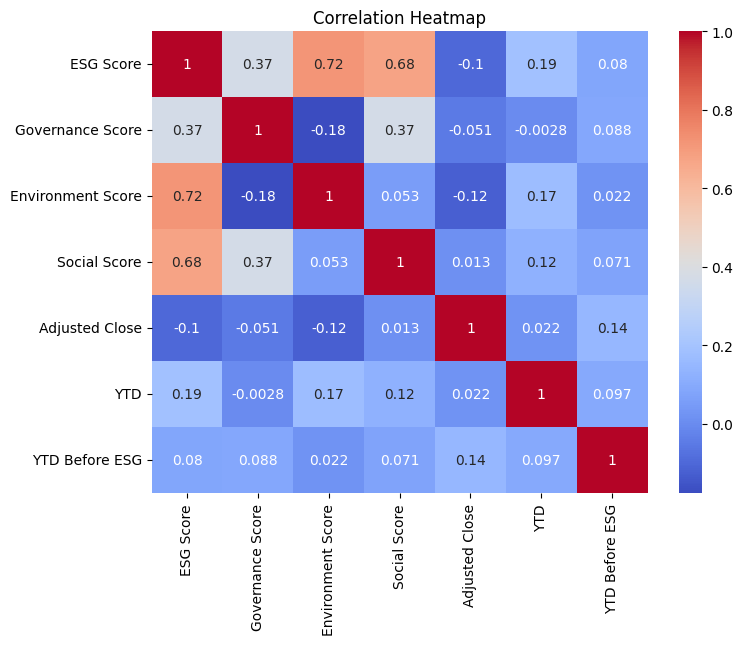

In [7]:
# Computing the correlation matrix
df.drop(columns='Year', inplace=True)
correlation_matrix = df.corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

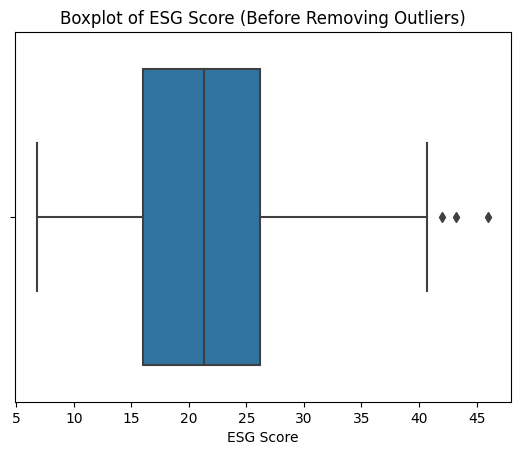

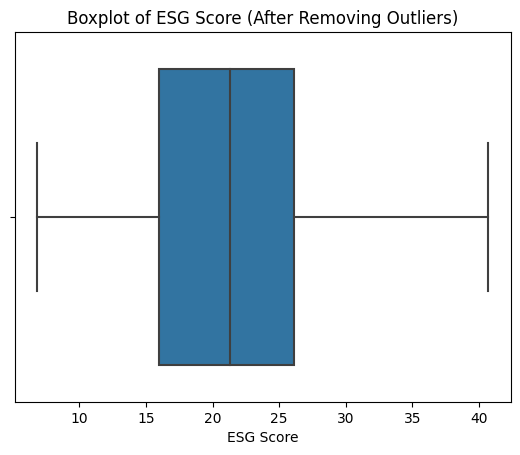

In [8]:
sns.boxplot(x=df['ESG Score'])
plt.title('Boxplot of ESG Score (Before Removing Outliers)')
plt.show()

# Handling outliers in 'ESG Score'
Q1 = df['ESG Score'].quantile(0.25)  # 25th percentile
Q3 = df['ESG Score'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile Range

# Defining bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing outliers
df  = df[(df['ESG Score'] >= lower_bound) & (df['ESG Score'] <= upper_bound)]

# Visualizing 'ESG Score' again using a boxplot after removing outliers
sns.boxplot(x=df['ESG Score'])
plt.title('Boxplot of ESG Score (After Removing Outliers)')
plt.show()

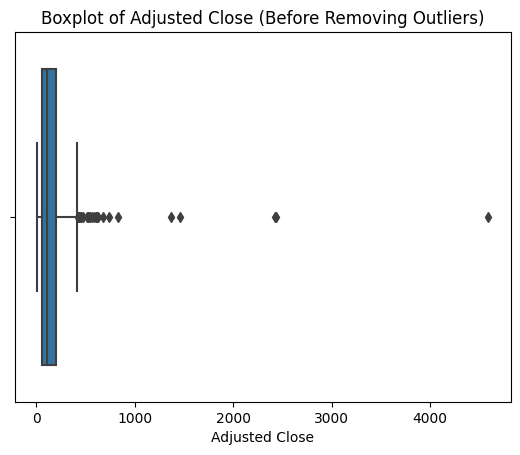

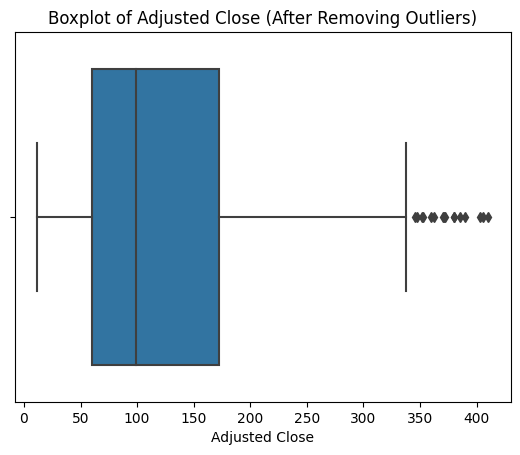

In [9]:
# Visualizing outliers in 'Adj Close' using a boxplot
sns.boxplot(x=df['Adjusted Close'])
plt.title('Boxplot of Adjusted Close (Before Removing Outliers)')
plt.show()

# Handling outliers in 'Adj Close'
Q1 = df['Adjusted Close'].quantile(0.25)  # 25th percentile
Q3 = df['Adjusted Close'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile Range

# Defining bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing outliers
df = df[(df['Adjusted Close'] >= lower_bound) & (df['Adjusted Close'] <= upper_bound)]

# Visualizing 'Adj Close' again using a boxplot after removing outliers
sns.boxplot(x=df['Adjusted Close'])
plt.title('Boxplot of Adjusted Close (After Removing Outliers)')
plt.show()

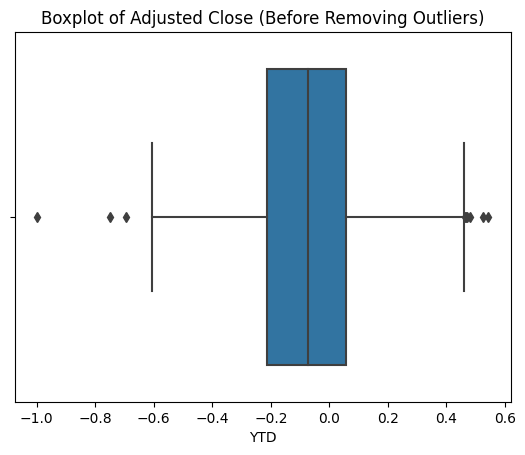

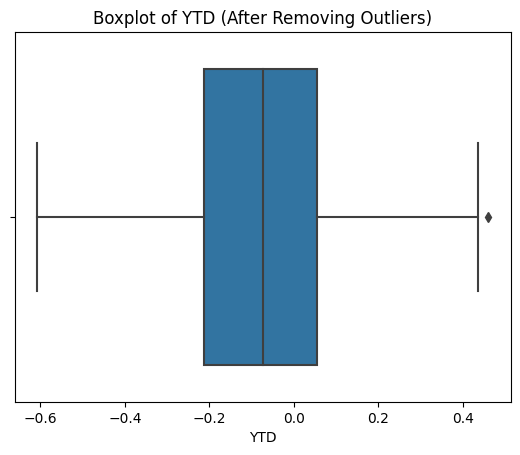

In [10]:
# Visualizing outliers in 'Adj Close' using a boxplot
sns.boxplot(x=df['YTD'])
plt.title('Boxplot of Adjusted Close (Before Removing Outliers)')
plt.show()

# Handling outliers in 'Adj Close'
Q1 = df['YTD'].quantile(0.25)  # 25th percentile
Q3 = df['YTD'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile Range

# Defining bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing outliers
df = df[(df['YTD'] >= lower_bound) & (df['YTD'] <= upper_bound)]

# Visualizing 'Adj Close' again using a boxplot after removing outliers
sns.boxplot(x=df['YTD'])
plt.title('Boxplot of YTD (After Removing Outliers)')
plt.show()

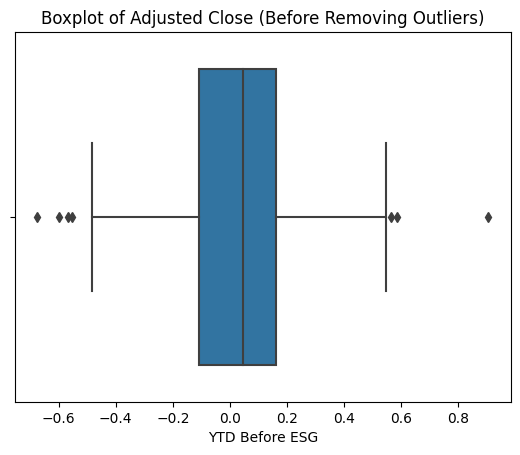

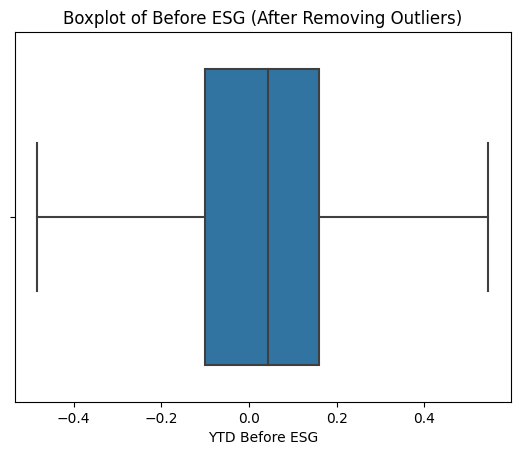

In [11]:
# Visualizing outliers in 'Adj Close' using a boxplot
sns.boxplot(x=df['YTD Before ESG'])
plt.title('Boxplot of Adjusted Close (Before Removing Outliers)')
plt.show()

# Handling outliers in 'Adj Close'
Q1 = df['YTD Before ESG'].quantile(0.25)  # 25th percentile
Q3 = df['YTD Before ESG'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile Range

# Defining bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing outliers
df = df[(df['YTD Before ESG'] >= lower_bound) & (df['YTD Before ESG'] <= upper_bound)]

# Visualizing 'Adj Close' again using a boxplot after removing outliers
sns.boxplot(x=df['YTD Before ESG'])
plt.title('Boxplot of Before ESG (After Removing Outliers)')
plt.show()

<ipython-input-12-90e9bb5b74db>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby('ESG Score').mean()


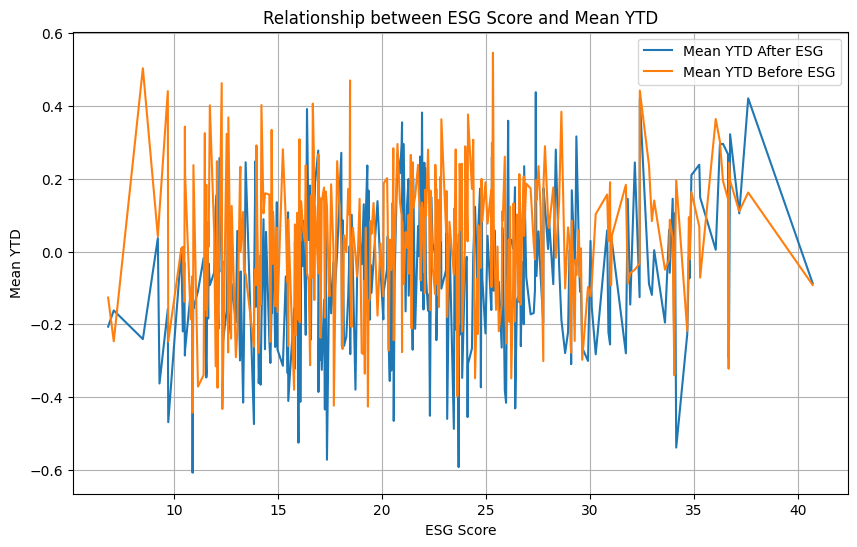

In [12]:
grouped = df.groupby('ESG Score').mean()

# Plotting the means against 'ESG Score'
plt.figure(figsize=(10, 6))

# Plot 'ESG Score' against mean of 'YTD After ESG'
plt.plot(grouped.index, grouped['YTD'], label='Mean YTD After ESG')

# Plot 'ESG Score' against mean of 'YTD Before ESG'
plt.plot(grouped.index, grouped['YTD Before ESG'], label='Mean YTD Before ESG')

# Graph labels and title
plt.xlabel('ESG Score')
plt.ylabel('Mean YTD')
plt.title('Relationship between ESG Score and Mean YTD')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
X = df['ESG Score']

# Dependent variable (Adjusted Close)
y = df['YTD']

# Add a constant to the independent variables (for intercept)
X = sm.add_constant(X)

# Fit the multiple regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    YTD   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     13.47
Date:                Tue, 05 Dec 2023   Prob (F-statistic):           0.000278
Time:                        18:47:15   Log-Likelihood:                 82.221
No. Observations:                 382   AIC:                            -160.4
Df Residuals:                     380   BIC:                            -152.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1839      0.033     -5.579      0.0

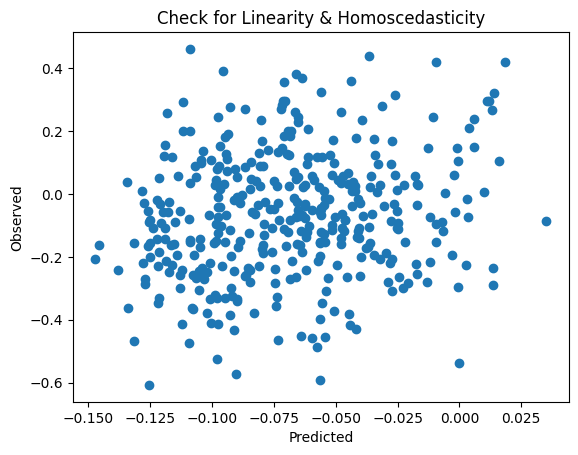

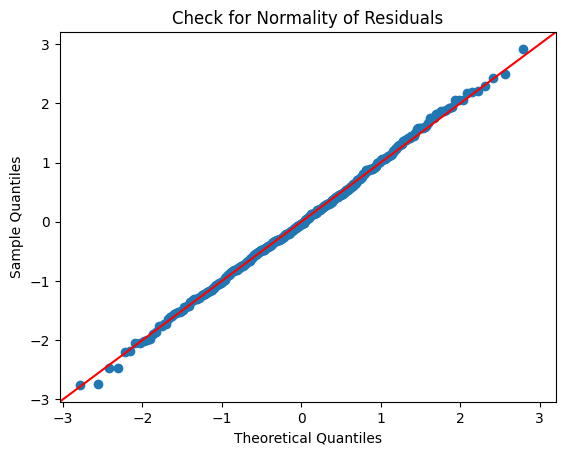

In [14]:
# 1. Linearity & Homoscedasticity: Scatter plot of observed vs predicted values and residuals vs predicted values
residuals = model.resid  # Gets the residuals of the model
plt.scatter(model.predict(), y)
plt.title('Check for Linearity & Homoscedasticity')
plt.xlabel('Predicted')
plt.ylabel('Observed')
plt.show()

# 2. Normality of Residuals: Q-Q plot
sm.qqplot(residuals, line='45', fit=True)
plt.title('Check for Normality of Residuals')
plt.show()


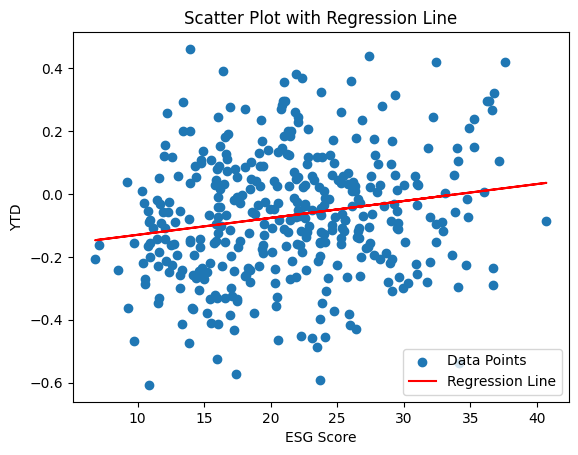

In [15]:
X = df['ESG Score']  # Independent Variable
Y = df['YTD']  # Dependent Variable
# Perform linear regression
coefficients = np.polyfit(X, Y, 1)
slope, intercept = coefficients

# Create scatter plot
plt.scatter(X, Y, label='Data Points')

# Plot regression line
regression_line = np.polyval(coefficients, X)
plt.plot(X, regression_line, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('ESG Score')
plt.ylabel('YTD')
plt.title('Scatter Plot with Regression Line')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [16]:
X = df['ESG Score']  # Independent variable
y = df['Adjusted Close']  # Dependent variable

# Add a constant to the independent variable (for intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Adjusted Close   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     4.593
Date:                Tue, 05 Dec 2023   Prob (F-statistic):             0.0327
Time:                        18:47:25   Log-Likelihood:                -2263.8
No. Observations:                 382   AIC:                             4532.
Df Residuals:                     380   BIC:                             4540.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        158.8338     15.318     10.369      0.0

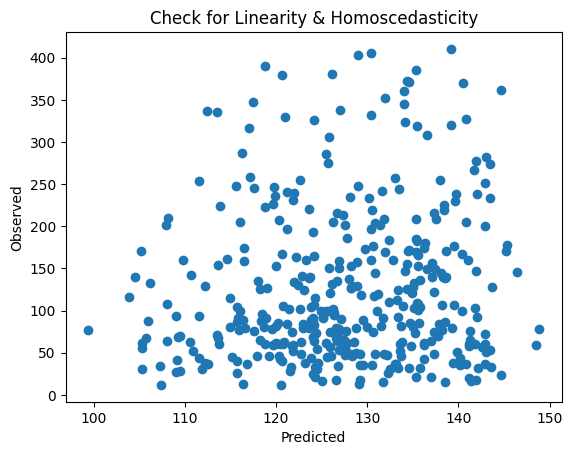

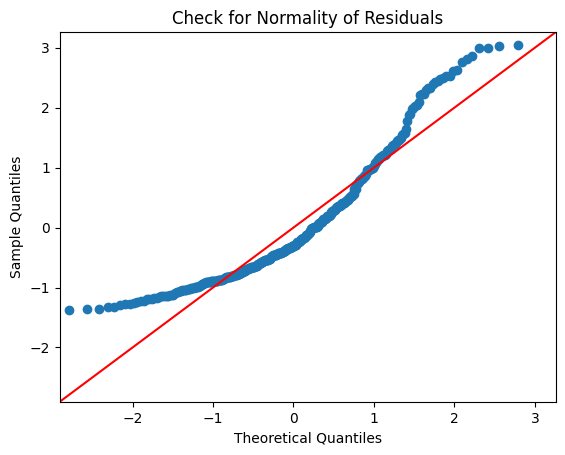

In [17]:
# 1. Linearity & Homoscedasticity: Scatter plot of observed vs predicted values and residuals vs predicted values
residuals = model.resid  # Gets the residuals of the model
plt.scatter(model.predict(), y)
plt.title('Check for Linearity & Homoscedasticity')
plt.xlabel('Predicted')
plt.ylabel('Observed')
plt.show()

# 2. Normality of Residuals: Q-Q plot
sm.qqplot(residuals, line='45', fit=True)
plt.title('Check for Normality of Residuals')
plt.show()

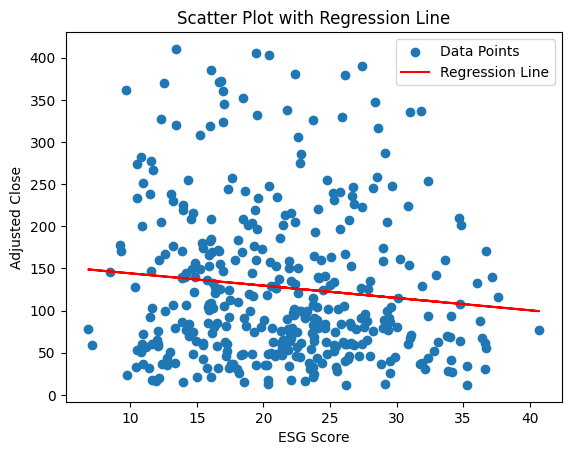

In [18]:
X = df['ESG Score']  # Independent Variable
Y = df['Adjusted Close']  # Dependent Variable
# Perform linear regression
coefficients = np.polyfit(X, Y, 1)
slope, intercept = coefficients

# Create scatter plot
plt.scatter(X, Y, label='Data Points')

# Plot regression line
regression_line = np.polyval(coefficients, X)
plt.plot(X, regression_line, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('ESG Score')
plt.ylabel('Adjusted Close')
plt.title('Scatter Plot with Regression Line')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [19]:
X = df['ESG Score']  # Independent Variable
Y = df['Adjusted Close']  # Dependent Variable

log_x = np.log(X)
log_y = np.log(Y)

# Adding a constant and fitting the model
log_x = sm.add_constant(log_x)
model = sm.OLS(log_y, log_x).fit()
model.summary()


# Get the p-value of the F-statistic and print it in decimal notation
f_pvalue_str = "{:.20f}".format(model.f_pvalue)
print("P-value of the F-statistic:", f_pvalue_str)

# Display the summary
print(model.summary())

P-value of the F-statistic: 0.11830337481331985872
                            OLS Regression Results                            
Dep. Variable:         Adjusted Close   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.451
Date:                Tue, 05 Dec 2023   Prob (F-statistic):              0.118
Time:                        18:47:57   Log-Likelihood:                -437.62
No. Observations:                 382   AIC:                             879.2
Df Residuals:                     380   BIC:                             887.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

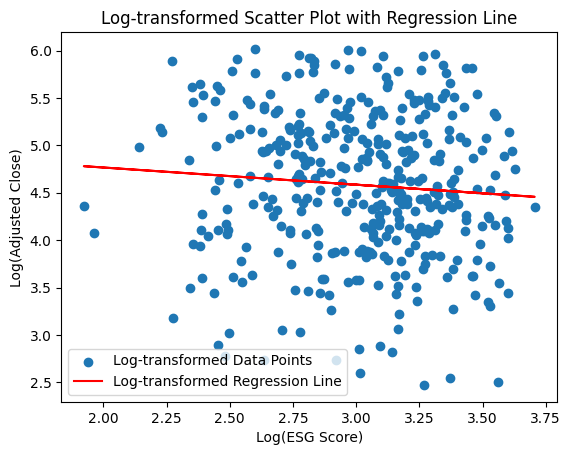

In [20]:
X = df['ESG Score']  # Independent Variable
Y = df['Adjusted Close']  # Dependent Variable

log_x = np.log(X)
log_y = np.log(Y)

# Perform linear regression on the log-transformed data
coefficients = np.polyfit(log_x, log_y, 1)
slope, intercept = coefficients

# Create scatter plot of log-transformed data
plt.scatter(log_x, log_y, label='Log-transformed Data Points')

# Plot regression line on log-transformed data
regression_line = np.polyval(coefficients, log_x)
plt.plot(log_x, regression_line, color='red', label='Log-transformed Regression Line')

# Add labels and title
plt.xlabel('Log(ESG Score)')
plt.ylabel('Log(Adjusted Close)')
plt.title('Log-transformed Scatter Plot with Regression Line')

# Add a legend
plt.legend()

# Display the plot
plt.show()

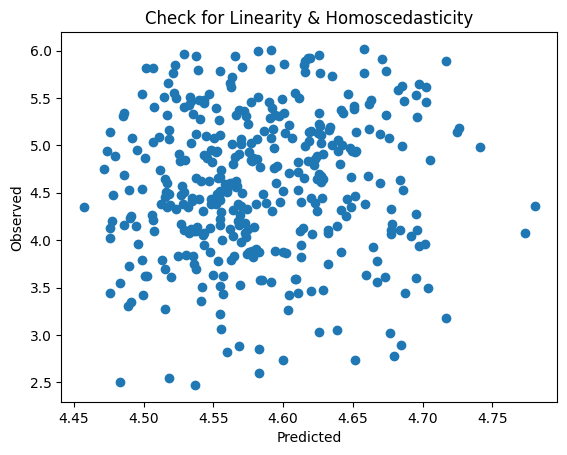

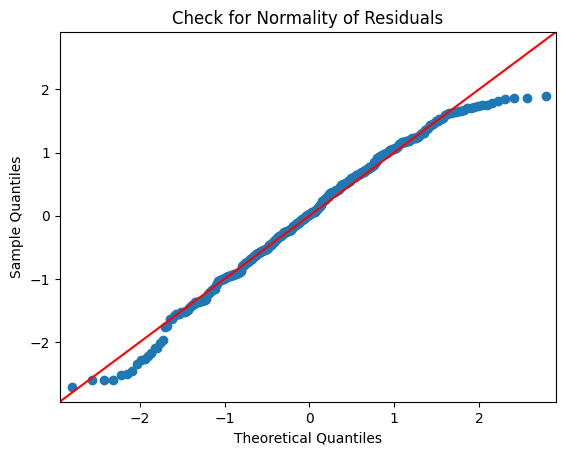

In [21]:
# 1. Linearity & Homoscedasticity: Scatter plot of observed vs predicted values and residuals vs predicted values
residuals = model.resid  # Gets the residuals of the model
plt.scatter(model.predict(), log_y)
plt.title('Check for Linearity & Homoscedasticity')
plt.xlabel('Predicted')
plt.ylabel('Observed')
plt.show()

# 2. Normality of Residuals: Q-Q plot
sm.qqplot(residuals, line='45', fit=True)
plt.title('Check for Normality of Residuals')
plt.show()

                            ESG Score                         YTD            \
                                 mean  median       std      mean    median   
Sector                                                                        
Consumer Discretionary      18.236279  16.300  6.267365 -0.127003 -0.135580   
Consumer Staples            24.961000  23.890  5.608370 -0.036276 -0.046449   
Energy                      30.267500  32.700  7.132140  0.193491  0.280775   
Financials                  20.991064  21.280  4.526442 -0.107741 -0.088856   
Health Care                 22.373590  22.560  5.067686 -0.075447 -0.092530   
Industrials                 24.430444  24.080  6.902446 -0.015977 -0.016757   
Information Technology      16.844783  16.310  4.738334 -0.085157 -0.066795   
Materials                   24.717222  24.460  6.380228 -0.137086 -0.134709   
Real Estate                 12.549130  12.360  2.274785 -0.174814 -0.195270   
Telecommunication Services  20.275000  20.275  2.538

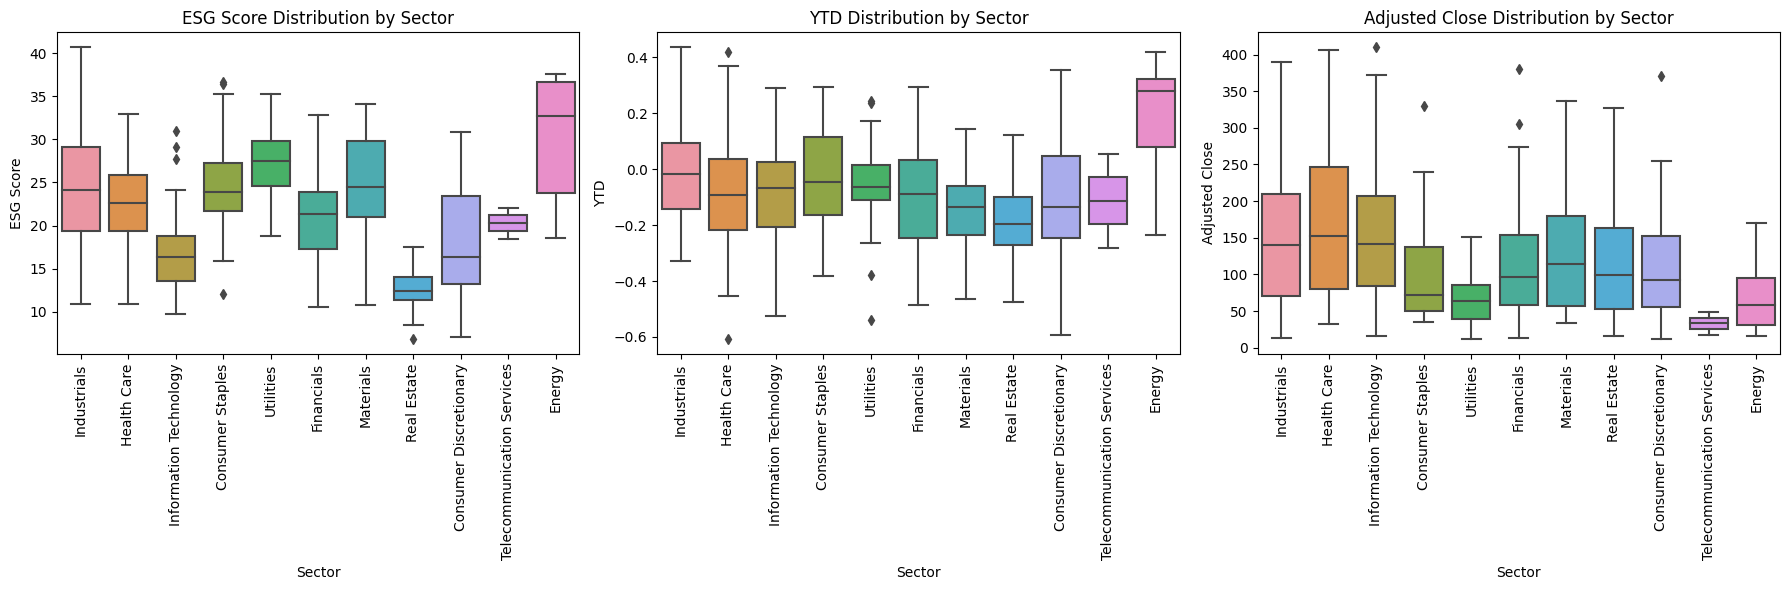

In [42]:
grouped_data = df.groupby('Sector')

# Summary statistics for each sector
summary_by_sector = grouped_data.agg({'ESG Score': ['mean', 'median', 'std'],'YTD': ['mean', 'median', 'std', 'count'], 'Adjusted Close': ['mean', 'median', 'std', 'count']})

# Display summary statistics
print(summary_by_sector)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Boxplot for ESG Score
sns.boxplot(x='Sector', y='ESG Score', data=df, ax=axes[0])
axes[0].set_title('ESG Score Distribution by Sector')
axes[0].set_ylabel('ESG Score')
axes[0].set_xlabel('Sector')
axes[0].tick_params(axis='x', rotation=90)  # Rotating x-axis labels for better readability

# Boxplot for YTD Returns
sns.boxplot(x='Sector', y='YTD', data=df, ax=axes[1])
axes[1].set_title('YTD Distribution by Sector')
axes[1].set_ylabel('YTD')
axes[1].set_xlabel('Sector')
axes[1].tick_params(axis='x', rotation=90)  # Rotating x-axis labels for better readability

# Boxplot for YTD Returns
sns.boxplot(x='Sector', y='Adjusted Close', data=df, ax=axes[2])
axes[2].set_title('Adjusted Close Distribution by Sector')
axes[2].set_ylabel('Adjusted Close')
axes[2].set_xlabel('Sector')
axes[2].tick_params(axis='x', rotation=90)  # Rotating x-axis labels for better readability

plt.tight_layout()
plt.show()

In [23]:
df_region = df['Headquarters Location'].str.split(',').str[-1].str.strip()
state_esg_scores = df.groupby(df_region)['ESG Score'].mean()
state_esg_scores_summary_stats = df.groupby(df_region)['ESG Score'].describe()


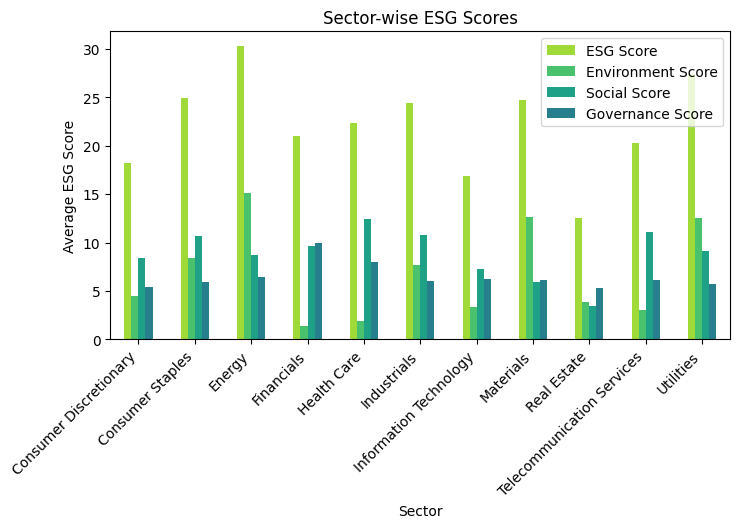

In [24]:
# Calculate average ESG scores by sector
numeric_columns = ['ESG Score', 'Environment Score', 'Social Score', 'Governance Score']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
sector_esg_scores = df.groupby('Sector')[numeric_columns].mean()

custom_colors = sns.color_palette('viridis_r')


# Visualize the sector-wise ESG scores
sector_esg_scores.plot(kind='bar', figsize=(8, 4), color=custom_colors)
plt.title('Sector-wise ESG Scores')
plt.ylabel('Average ESG Score')
plt.xlabel('Sector')
plt.xticks(rotation=45, ha='right')
plt.show()

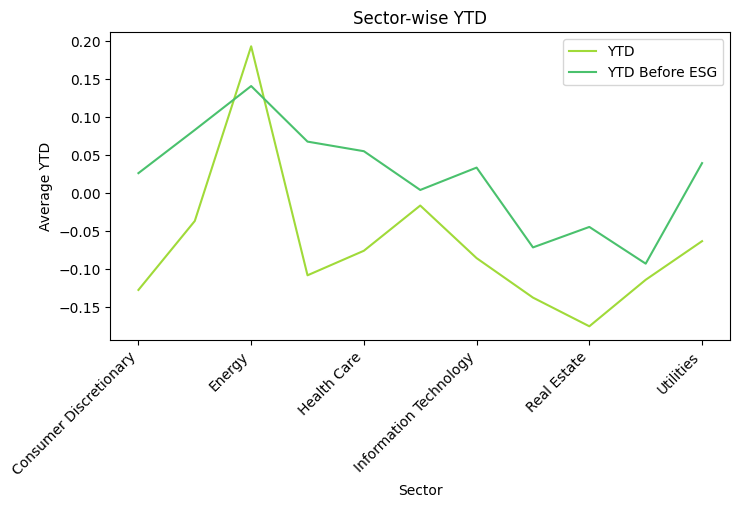

In [25]:
# Calculate average ESG scores by sector
numeric_columns = ['YTD', 'YTD Before ESG']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
sector_esg_scores = df.groupby('Sector')[numeric_columns].mean()

custom_colors = sns.color_palette('viridis_r')


# Visualize the sector-wise ESG scores
sector_esg_scores.plot(kind='line', figsize=(8, 4), color=custom_colors)
plt.title('Sector-wise YTD')
plt.ylabel('Average YTD')
plt.xlabel('Sector')
plt.xticks(rotation=45, ha='right')
plt.show()

In [37]:
df_region = df['Headquarters Location'].str.split(',').str[-1].str.strip()
state_esg_scores = df.groupby(df_region)['ESG Score'].describe()

# Sort state_esg_scores DataFrame based on the count of companies in descending order
state_esg_scores_sorted = state_esg_scores.sort_values(by='count', ascending=False)

# Convert Series to DataFrame
state_esg_scores_df = state_esg_scores_sorted.reset_index()
state_esg_scores_df['mean_times_count'] = state_esg_scores_df['mean'] * state_esg_scores_df['count']

# Columns to be dropped
columns_to_drop = ['std', 'min', '25%', '50%', '75%', 'max']

# Drop the specified columns
state_esg_scores_df.drop(columns=columns_to_drop, inplace=True)

print(state_esg_scores_df)



   Headquarters Location  count       mean  mean_times_count
0             California   52.0  17.731346            922.03
1               New York   39.0  19.629231            765.54
2                  Texas   31.0  23.249355            720.73
3               Illinois   29.0  21.667931            628.37
4                Georgia   17.0  20.343529            345.84
5                   Ohio   15.0  23.244667            348.67
6          Massachusetts   14.0  20.975714            293.66
7                Florida   13.0  22.278462            289.62
8               Virginia   13.0  22.396154            291.15
9             New Jersey   13.0  20.654615            268.51
10          Pennsylvania   13.0  26.033846            338.44
11        North Carolina   11.0  23.883636            262.72
12             Minnesota   10.0  23.087000            230.87
13              Michigan    9.0  23.690000            213.21
14           Connecticut    9.0  20.155556            181.40
15            Washington

In [38]:
# Mapping state names to their abbreviations
state_name_mapping = {state.name: state.abbr for state in us.states.STATES}

# Your data processing steps to generate state-wise ESG scores
# Assuming df contains the necessary data and 'ESG Score' column represents the scores

# Extracting state names from the 'Headquarters Location' column
df_region = state_esg_scores_df['Headquarters Location'].str.split(',').str[-1].str.strip()

# Grouping by states and calculating mean ESG scores
# state_esg_scores = state_esg_scores_df.groupby(df_region)['mean_times_count'].mean()

# Mapping state names to abbreviations
state_esg_scores_index = state_esg_scores_index = df_region.map(state_name_mapping)

# Plotting the Choropleth Map
fig = go.Figure(data=go.Choropleth(
    locations=state_esg_scores_index,
    z=state_esg_scores_df['mean_times_count'],
    locationmode='USA-states',
    colorscale='Reds',  # Try different color scales if needed
    colorbar_title='ESG Score',
    zmin=state_esg_scores_df['mean_times_count'].min(),  # Adjust min and max values if necessary
    zmax=state_esg_scores_df['mean_times_count'].max(),
))

fig.update_layout(
    title_text='State-wise ESG Scores',
    geo_scope='usa',
)

fig.show()

In [35]:
from tabulate import tabulate

# Assuming 'state_esg_scores_df' contains the DataFrame you want to display as a table
table = tabulate(state_esg_scores_df.head(), headers='keys', tablefmt='pretty')

print(table)

+---+-----------------------+-------+--------------------+--------------------+
|   | Headquarters Location | count |        mean        |  mean_times_count  |
+---+-----------------------+-------+--------------------+--------------------+
| 0 |      California       | 52.0  | 17.731346153846154 |       922.03       |
| 1 |       New York        | 39.0  | 19.62923076923077  |       765.54       |
| 2 |         Texas         | 31.0  | 23.24935483870967  | 720.7299999999998  |
| 3 |       Illinois        | 29.0  | 21.66793103448276  |       628.37       |
| 4 |        Georgia        | 17.0  | 20.343529411764706 | 345.84000000000003 |
+---+-----------------------+-------+--------------------+--------------------+


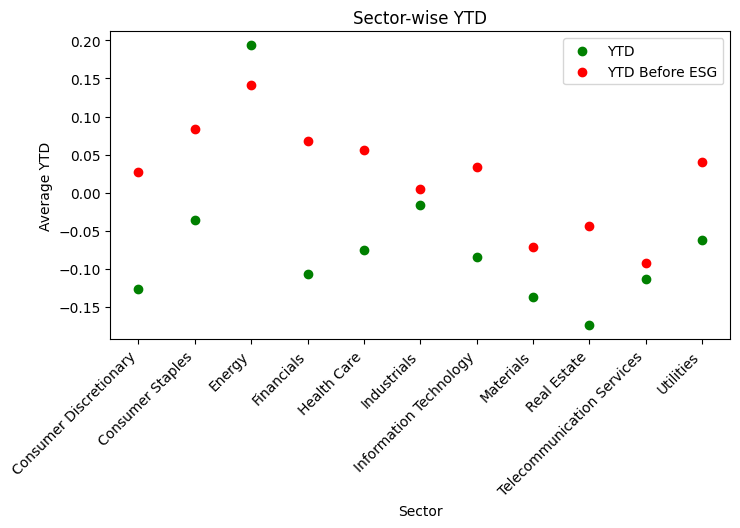

In [36]:
numeric_columns = ['YTD', 'YTD Before ESG']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
sector_esg_scores = df.groupby('Sector')[numeric_columns].mean()

# Set custom colors for the plot
custom_colors = ['green','red']

# Visualize the sector-wise ESG scores as points without lines
plt.figure(figsize=(8, 4))
for i, col in enumerate(numeric_columns):
    plt.scatter(sector_esg_scores.index, sector_esg_scores[col], label=col, color=custom_colors[i])

plt.title('Sector-wise YTD')
plt.ylabel('Average YTD')
plt.xlabel('Sector')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()